        Accuracy  Precision     Recall  False Positive Rate    AUC ROC  \
count  22.000000  22.000000  22.000000            22.000000  22.000000   
mean    0.940579   0.915420   0.903362             0.043292   0.978720   
std     0.031772   0.045280   0.058970             0.021437   0.015516   
min     0.837226   0.772652   0.711057             0.006425   0.929922   
25%     0.929807   0.909568   0.890617             0.031409   0.972824   
50%     0.942041   0.919110   0.914892             0.044029   0.980619   
75%     0.957777   0.948018   0.941369             0.053017   0.989827   
max     0.987026   0.971823   0.972366             0.101542   0.996966   

        R2 Score  
count  22.000000  
mean    0.677740  
std     0.122949  
min     0.383498  
25%     0.610787  
50%     0.679267  
75%     0.743272  
max     0.865105  


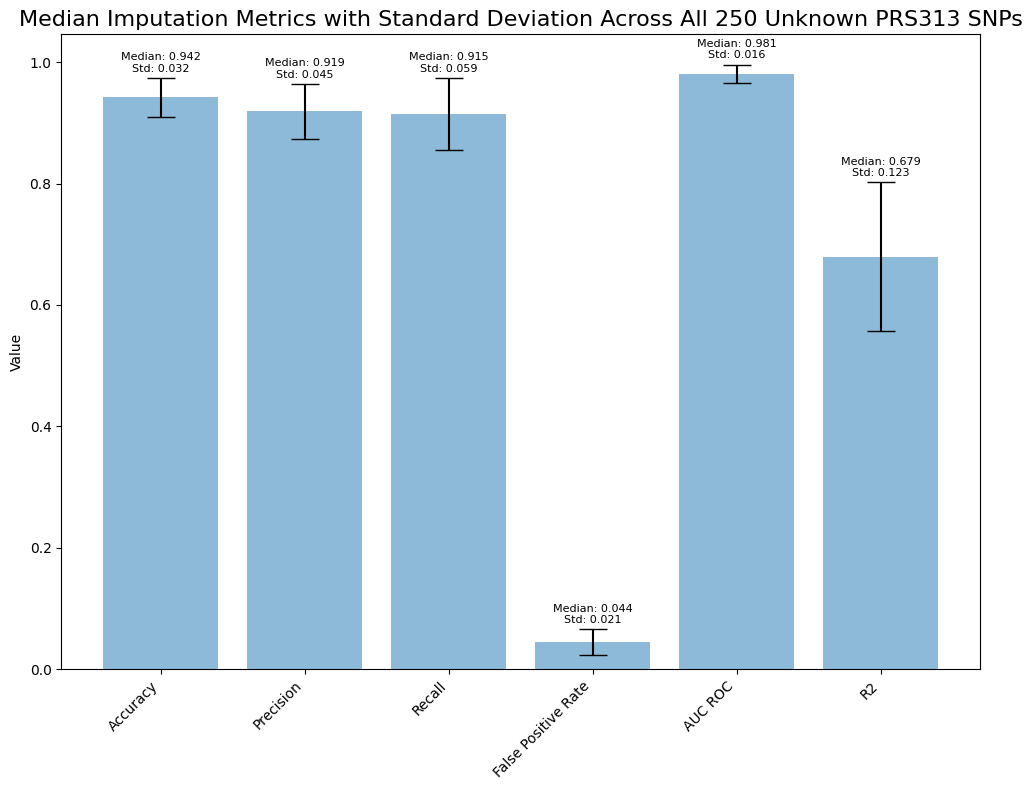

In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set the path to the folder containing the result files
folder_path = "../../Data/model_results/logistic_regression/csv_files"

# Initialize an empty list to store the dataframes
dataframes = []

# Iterate over the files in the folder again to read the modified files
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Concatenate all the dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df = combined_df.dropna()

# Drop the Chromosome Column
combined_df = combined_df.drop(columns='Chromosome')

# Calculate summary statistics
summary_stats = combined_df.describe()

print(summary_stats)

# Extract the median values and standard deviations
medians = summary_stats.loc['50%'].values
std_devs = summary_stats.loc['std'].values

# Create a list of metric names
metrics = ['Accuracy', 'Precision', 'Recall', 'False Positive Rate', 'AUC ROC', 'R2']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create a bar plot of the medians with error bars
x = range(len(metrics))
ax.bar(x, medians, yerr=std_devs, align='center', alpha=0.5, ecolor='black', capsize=10)

# Set the x-tick labels to the metric names
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right')

# Set the labels and title
ax.set_ylabel('Value')
ax.set_title('Median Imputation Metrics with Standard Deviation Across All 250 Unknown PRS313 SNPs', fontsize=16)


# Display the values of median and standard deviation on the bars
for i, v in enumerate(medians):
    ax.text(i, v + std_devs[i] + 0.01, f"Median: {v:.3f}\nStd: {std_devs[i]:.3f}", ha='center', fontsize=8)

# Adjust the layout
fig.tight_layout()

# Display the plot
plt.show()

/var/folders/yg/982c10113957_2gb06y92y35sx509h/T/ipykernel_45723/3032000541.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(chr_folders))


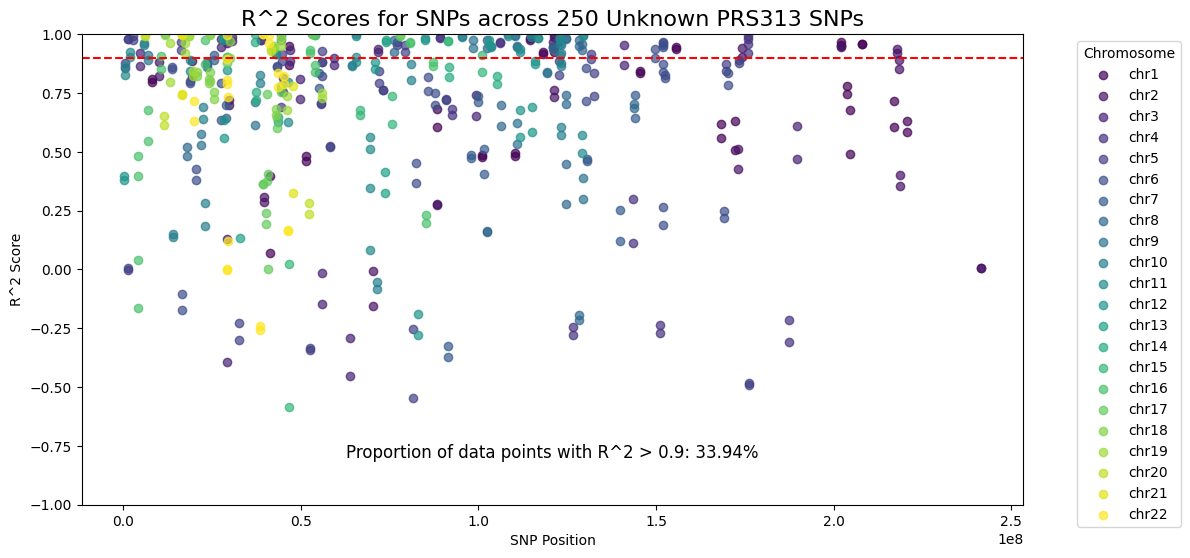

In [48]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Specify the base directory path
base_dir = '../../Data/model_results/logistic_regression/csv_files/'

# Get the list of chromosome folders
chr_folders = [folder for folder in os.listdir(base_dir) if folder.startswith('chr')]

# Sort the chromosome folders
chr_folders.sort(key=lambda x: int(x[3:]))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define a color map
cmap = plt.cm.get_cmap('viridis', len(chr_folders))

total_data_points = 0
data_points_above_threshold = 0

# Iterate over each chromosome folder
for i, chr_folder in enumerate(chr_folders):
    # Get the CSV file path
    csv_file = os.path.join(base_dir, chr_folder, 'individual_r2_scores_' + chr_folder + '.csv')
    
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Extract the chromosome and SNP position from the SNP column
    df[['chromosome', 'position']] = df['SNP'].str.split('_', n=2, expand=True)[[0, 1]]
    
    # Convert position to numeric
    df['position'] = pd.to_numeric(df['position'])
    
    # Create a scatter plot for the current chromosome
    ax.scatter(df['position'], df['R2 Score'], label=chr_folder, color=cmap(i), alpha=0.7)
    
    # Calculate the number of data points above the threshold for the current chromosome
    data_points_above_threshold += (df['R2 Score'] > 0.9).sum()
    total_data_points += len(df)

# Calculate the proportion of data points above the threshold
proportion = data_points_above_threshold / total_data_points

# Add a dashed line at 0.536
ax.axhline(y=0.9, color='red', linestyle='--', linewidth=1.5)

# Set the title and labels
ax.set_title('R^2 Scores for SNPs across 250 Unknown PRS313 SNPs', fontsize=16)
ax.set_xlabel('SNP Position')
ax.set_ylabel('R^2 Score')

# Set the y-axis limits
ax.set_ylim(-1, 1)

# Create a legend with the sorted chromosome order
handles, labels = ax.get_legend_handles_labels()
legend_order = [labels.index(chr_folder) for chr_folder in chr_folders]
ax.legend([handles[i] for i in legend_order], [labels[i] for i in legend_order], title='Chromosome', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add the proportion annotation at the bottom
ax.text(0.5, 0.1, f'Proportion of data points with R^2 > 0.9: {proportion:.2%}', transform=ax.transAxes, fontsize=12, ha='center')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Adjust the bottom margin to make room for the text
plt.subplots_adjust(bottom=0.15)

# Display the plot
plt.show()

In [45]:
total_data_points

498